<a href="https://colab.research.google.com/github/rakeshvitta/rakeshvitta/blob/main/Group250_Wheat_seed_Classification_problem.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<b>SUBJECT NAME:</b>Machine Learning <br>
<b>SUBJECT CODE:</b>DSECLZ G565 <br><br>
<b>GROUP NAME:</b> Group_250<br>
<b>Assignment 2 - PS6<br><br>
<b>GROUP MEMBERS:</b><br>
    1. N VISWANATHAN (2021FC04318)<br>
    2. NAVIN APPUKUTTAN NAIR (2021FC04720)<br>
    3. RAKESH VITTA (2021FC04673)<br><br>
<b>ASSIGNMENT DATASET:</b> https://raw.githubusercontent.com/rakeshvitta/rakeshvitta/main/seeds.csv<br>

In [1]:
#HANDLE WARNINGS
import warnings
warnings.filterwarnings('ignore')

#DATA WRANGLING
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', 26)

#DATA VISUALIZATION 
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
plt.style.use('fivethirtyeight')
%matplotlib inline

#STATS/MACHINE LEARNING
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix ,classification_report, accuracy_score, precision_score, recall_score ,f1_score, roc_curve, roc_auc_score, auc
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.preprocessing import PowerTransformer
from sklearn.multiclass import OneVsRestClassifier
from sklearn import datasets
from itertools import cycle
from sklearn.preprocessing import label_binarize
from sklearn.tree import export_graphviz
import graphviz

In [95]:
#Importing Data set. Copied the dataset to github and accessing it from there
url = 'https://raw.githubusercontent.com/rakeshvitta/rakeshvitta/main/seeds.csv'
df = pd.read_csv(url)
#Replace . in column name for better readability and use in code below
df.columns=df.columns.str.replace('.','_')
df.head()


,Area,Perimeter,Compactness,Kernel_Length,Kernel_Width,Asymmetry_Coeff,Kernel_Groove,Type
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1


## 1.Data Visualization and Exploration



### Q1
<text>Print 2 rows for sanity check to identify all the features present in the dataset and if 
the target matches with them.</text>

In [3]:
print('Features in dataset:', ', '.join(df.columns[:-1]))
print('Target in dataset  :', ', '.join(df.columns[-1:]))

print('Shape of dataset: Rows -', df.shape[0], ' Columns -', df.shape[1])

Features in dataset: Area, Perimeter, Compactness, Kernel_Length, Kernel_Width, Asymmetry_Coeff, Kernel_Groove
Target in dataset  : Type
Shape of dataset: Rows - 199  Columns - 8


In [4]:
df.head(2)

,Area,Perimeter,Compactness,Kernel_Length,Kernel_Width,Asymmetry_Coeff,Kernel_Groove,Type
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1


In [5]:
df.describe()

,Area,Perimeter,Compactness,Kernel_Length,Kernel_Width,Asymmetry_Coeff,Kernel_Groove,Type
count,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000
mean,14.918744,14.595829,0.870811,5.643151,3.265533,3.699217,5.420653,1.994975
std,2.919976,1.310445,0.023320,0.443593,0.378322,1.471102,0.492718,0.813382
min,10.590000,12.410000,0.808100,4.899000,2.630000,0.765100,4.519000,1.000000
25%,12.330000,13.470000,0.857100,5.267000,2.954500,2.570000,5.046000,1.000000
50%,14.430000,14.370000,0.873400,5.541000,3.245000,3.631000,5.228000,2.000000
75%,17.455000,15.805000,0.886800,6.002000,3.564500,4.799000,5.879000,3.000000
max,21.180000,17.250000,0.918300,6.675000,4.033000,8.315000,6.550000,3.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 199 entries, 0 to 198
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area             199 non-null    float64
 1   Perimeter        199 non-null    float64
 2   Compactness      199 non-null    float64
 3   Kernel_Length    199 non-null    float64
 4   Kernel_Width     199 non-null    float64
 5   Asymmetry_Coeff  199 non-null    float64
 6   Kernel_Groove    199 non-null    float64
 7   Type             199 non-null    int64  
dtypes: float64(7), int64(1)
memory usage: 12.6 KB


### Q2
<text>Comment on class imbalance with appropriate visualization method. </text>

In [7]:
counts = df.Type.value_counts()
print(counts)

2    68
1    66
3    65
Name: Type, dtype: int64


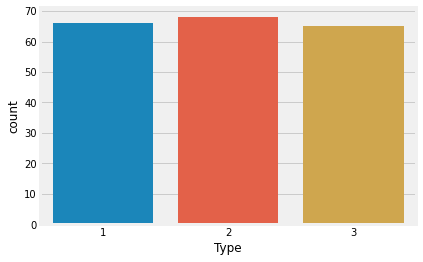

In [8]:
#Univariate analysis target.
sns.countplot(df['Type'])

In [9]:
fig = go.Figure(data=[
    go.Pie(labels=counts.index,
           values=counts.values,
           pull=[0.05] * len(counts))
])
fig.update_layout(
    template='seaborn',
    title='Target Label (Activity) - Class Distribution')

fig.show()

<text><b><u>Observations:</u></b><br> From both the plots, we infer <br>
    1. 33.2% of the datapoints (66 rows) belong to class '1' <br>
    2. 34.2% of the datapoints (68 rows) belong to class '2' <br>
    3. 32.7% of the datapoints (65 rows) belong to class '3' <br>
    4. The dataset is balanced across all three classes - having a balanced data set for a model would generate higher accuracy models, higher balanced accuracy and balanced detection rate


### Q3
<text>Provide appropriate visualizations to get an insight about the dataset.  </text>

In [10]:
df.head()

,Area,Perimeter,Compactness,Kernel_Length,Kernel_Width,Asymmetry_Coeff,Kernel_Groove,Type
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1


Area Distribution

Overall

In [11]:
fig = px.histogram(data_frame=df, marginal="box", x= 'Area', nbins=25)
fig.update_layout(template = 'seaborn',
                  title = 'Histogram plot - Area [+Marginal Box-plot]')

fig.show()
print('Mean(Area Value):', round(df.Area.mean(),2))

Mean(Area Value): 14.92


Observations:
<br> 1. The Area distribution is bi-modal and right-skewed (positive skew). <br>2. Area range from 10.59 (min) to 21.18 (max). <br>3. There are no outliers in the data. (x is outlier if x < 4.53375 & x > 25.28375)<br>4. 99.5% percent of the datapoints have Area value ∈ [10.5,21] <br>5. From the above box & histogram chart, we can infer that the median 'Area' is 14.43. Mean_Area = 14.92 Median_Area = 14.43. Since, the mean is greater than median (which is greater than the mode), it is right skewed

Area Distribution

By Type

In [12]:
fig = px.histogram(data_frame=df, color='Type', marginal="box", x='Area', nbins=25)
fig.update_layout(template = 'seaborn',
                  title = 'Histogram plot - Area by Type (Target) [+Marginal Box-plot]')

fig.show()

means = df.groupby('Type').Area.mean()
[print(f'Mean(Area_{i[0]}):', round(i[1],2)) for i in enumerate(means)];

Mean(Area_0): 14.35
Mean(Area_1): 18.37
Mean(Area_2): 11.88


Observations:
<br>1. The Area distribution by Type classes are fairly normally distributed, with Type 2 and Type 3 slighlty inclined towards negative skew <br>2. Area range from 11.23-17.08 for Type 1, 15.38-21.18 for Class 2 and 10.59-13.37 for class 3.<br>3. Boxplot of Area by Type class shows that class '1' contains two outliers on either side where as class '2' and class '3' contains None. (x is outlier if Q3+1.5IQR < x < Q1-1.5IQR) <br>4. From the above box-plot and histogram charts, we can infer that the mean 'Area' count of class '1' lies fairly in between the mean Area of class '2' and '3'. 
<br>Mean and Median of all three calsses are fairly closer to each other with
<br>Type 1 - Mean Area - 14.35, Median Area - 14.36
<br>Type 2 - Mean Area - 18.37, Median Area - 18.72
<br>Type 3 - Mean Area - 11.88, Median Area - 11.84


Perimeter Distribution

Overall

In [13]:
fig = px.histogram(data_frame=df, marginal="box", x= 'Perimeter', nbins=25)
fig.update_layout(template = 'seaborn',
                  title = 'Histogram plot - Perimeter [+Marginal Box-plot]')

fig.show()
print('Mean(Perimeter Value):', round(df.Perimeter.mean(),2))

Mean(Perimeter Value): 14.6


Observations:
1. The Perimeter distribution is right-skewed (positive skew) with mode (13.4-13.59) less than the median (14.37) which is less than the mean (14.6).
2. Perimeter range from 12.41 (min) to 17.25 (max).
3. There are no outliers in the data. (x is outlier if x < 9.93375 & x > 19.36375)
4. 95% percent of the datapoints have Perimeter value ∈ [12.8,17]
5. From the above box & histogram chart, we can infer that the median 'Perimeter' is 14.37. Mean_Perimeter = 14.6 Median_Perimeter = 14.37. Since, the mean is greater than median (which is greater than the mode), it is right skewed

Perimeter Distribution

By Type

In [14]:
fig = px.histogram(data_frame=df, color='Type', marginal="box", x='Perimeter', nbins=25)
fig.update_layout(template = 'seaborn',
                  title = 'Histogram plot - Perimeter by Type (Target) [+Marginal Box-plot]')

fig.show()

means = df.groupby('Type').Perimeter.mean()
[print(f'Mean(Perimeter_{i[0]}):', round(i[1],2)) for i in enumerate(means)];

Mean(Perimeter_0): 14.31
Mean(Perimeter_1): 16.16
Mean(Perimeter_2): 13.26


Observations:
1. The Perimeter distribution by Type classes are fairly normally distributed for all three Types, with a very slighlty inclination towards negative skew
2. Perimeter range from 12.63-15.46 for Type 1, 14.89-17.25 for Type 2 and 12.41-13.95 for Type 3.
3. Boxplot of Perimeter by Type  shows that Type '1' contains one outlier where as Type '2' and Type '3' contains None. (x is outlier if Q3+1.5IQR < x < Q1-1.5IQR)
4. From the above box-plot and histogram charts, we can infer that the mean 'Perimeter' count of class '1' lies somewhere in between the mean Perimeter of class '2' and '3'.
Mean and Median of all three types are fairly closer to each other with
Type 1 - Mean Perimeter - 14.31, Median Perimeter - 14.32
Type 2 - Mean Perimeter - 16.16, Median Perimeter - 16.225
Type 3 - Mean Perimeter - 13.26, Median Perimeter - 13.27

Compactness

Overall

In [15]:
fig = px.histogram(data_frame=df, marginal="box", x= 'Compactness', nbins=25)
fig.update_layout(template = 'seaborn',
                  title = 'Histogram plot - Compactness [+Marginal Box-plot]')

fig.show()
print('Mean(Compactness Value):', round(df.Compactness.mean(),2))

Mean(Compactness Value): 0.87


Observations:

1. The Compactness distribution is left-skewed (negative skew) with mode (0.885-0.8899) grteater than the median (0.8734) which is greater than the mean (0.87).<br>
2. Compactness range from 0.8081 (min) to 0.9183 (max).<br>
3. There are 4 outliers in the data on the lower side. (x is outlier if x < 0.8119 & x > 0.9319)<br>
4. 85.5% percent of the datapoints have Compactness value ∈ [0.845,0.91]<br>
5. From the above box & histogram chart, we can infer that the median 'Compactness' is 0.8734. Mena_Compactness = 0.87 Median_Compactness = 0.8734. Since, the mean is less than median (which is less than the mode), it is left skewed

Compactness Distribution

By Type

In [16]:
fig = px.histogram(data_frame=df, color='Type', marginal="box", x='Compactness', nbins=25)
fig.update_layout(template = 'seaborn',
                  title = 'Histogram plot - Compactness by Type (Target) [+Marginal Box-plot]')

fig.show()

means = df.groupby('Type').Compactness.mean()
[print(f'Mean(Compactness_{i[0]}):', round(i[1],2)) for i in enumerate(means)];

Mean(Compactness_0): 0.88
Mean(Compactness_1): 0.88
Mean(Compactness_2): 0.85


Observations:

1. The Compactness distribution by Type classes are fairly distributed with a slight negative skew for all three Types<br>
2. Compactness range from 0.8392-0.9153 for Type 1, 0.8452-0.9108 for Type 2 and 0.8081-0.8964 for Type 3.<br>
3. Boxplot of Compactness by Type shows that Type '1' contains one outlier where as Type '2' and Type '3' contains None. (x is outlier if Q3+1.5IQR < x < Q1-1.5IQR)<br>
4. From the above box-plot and histogram charts, we can infer that the mean 'Compactness' count of class '1' and mean Compactness of class '2' are exactly the same and mean Compactness of Class '3' is only slightly less than the mean of Class '1' and '2' (3.5%). <br>Mean and Median of all three types are fairly closer to each other with <br>Type 1 - Mean Compactness - 0.88, Median Compactness - 0.8805 <br>Type 2 - Mean Compactness - 0.88, Median Compactness - 0.8823 <br>Type 3 - Mean Compactness - 0.85, Median Compactness - 0.8496

Kernel Length

Overall

In [17]:
fig = px.histogram(data_frame=df, marginal="box", x= 'Kernel_Length', nbins=25)
fig.update_layout(template = 'seaborn',
                  title = 'Histogram plot - Kernel Length [+Marginal Box-plot]')

fig.show()
print('Mean(Kernel Length Value):', round(df.Kernel_Length.mean(),2))

Mean(Kernel Length Value): 5.64


Observations:

1. The Kernel Length distribution is right-skewed (positive skew) with mode (5.35-5.45) lesser than the median (5.541) which is lesser than the mean (5.64).<br>
2. Kernel Length range from 4.899 (min) to 6.675 (max).<br>
3. There are no outliers in the data (x is outlier if x < 4.53 & x > 6.741)<br>
4. 94% percent of the datapoints have Kernel Length value ∈ [5.05,6.45]<br>
5. From the above box & histogram chart, we can infer that the median 'Kernel Length' is 5.541. Mean_Kernel_Length = 5.64 Median_Kernel_Length = 5.541. Since, the mean is greater than median (which is greater than the mode), it is right skewed

Kernel Length

By Type

In [18]:
fig = px.histogram(data_frame=df, color='Type', marginal="box", x='Kernel_Length', nbins=25)
fig.update_layout(template = 'seaborn',
                  title = 'Histogram plot - Kernel Length by Type (Target) [+Marginal Box-plot]')

fig.show()

means = df.groupby('Type').Kernel_Length.mean()
[print(f'Mean(Kernel_Length_{i[0]}):', round(i[1],2)) for i in enumerate(means)];

Mean(Kernel_Length_0): 5.51
Mean(Kernel_Length_1): 6.16
Mean(Kernel_Length_2): 5.24


Observations:

1. The Kernel Length distribution by Type classes follow a normal distribution for Type 2, while it is slightly negative skewed for Types 1 nd 3<br>
2. Kernel Length range from 4.902-6.053 for Type 1, 5.363-6.675 for Type 2 and 4.899-5.541 for Type 3.<br>
3. Boxplot of Kernel Length by Type shows that Type '1' and Type '2' contains one outlier where as Type '3' contains None. (x is outlier if Q3+1.5IQR < x < Q1-1.5IQR)<br>
4. From the above box-plot and histogram charts, we can infer that the mean 'Kernel Length' of class '1' and mean Kernel Length of class '3' are significantly closer as compared to mean Kernel Length of Class '2' - which is  almost 12% more than mean of Type 1 and 17.5% more than of Type 3 . <br>Mean and Median of all three types are significantly closer to each other with <br>Type 1 - Mean Kernel Length - 5.51, Median Kernel Length - 5.53 <br>Type 2 - Mean Kernel Length - 6.16, Median Kernel Length - 6.15 <br>Type 3 - Mean Kernel Length - 5.24, Median Kernel Length - 5.24

Kernel Width

Overall

In [19]:
fig = px.histogram(data_frame=df, marginal="box", x= 'Kernel_Width', nbins=10)
fig.update_layout(template = 'seaborn',
                  title = 'Histogram plot - Kernel Width [+Marginal Box-plot]')

fig.show()
print('Mean(Kernel Width Value):', round(df.Kernel_Width.mean(),2))

Mean(Kernel Width Value): 3.27


Observations:

1. The Kernel Width follows a fairly uniform distribution with mode (3.1-3.2), median (3.245) and the mean (3.27) values<br>
2. Kernel Width range from 2.63 (min) to 4.033 (max).<br>
3. There are no outliers in the data. (x is outlier if x < 2.343 & x > 4.177)<br>
4. 97% percent of the datapoints have Kernel Width value ∈ [2.6,3.9]<br>
5. From the above box & histogram chart, we can infer that the median 'Kernel Width' is 3.245. Mean_Kernel_Width = 3.27 Median_Kernel_Width = 3.245. 

Kernel Width

By Type

In [20]:
fig = px.histogram(data_frame=df, color='Type', marginal="box", x='Kernel_Width', nbins=25)
fig.update_layout(template = 'seaborn',
                  title = 'Histogram plot - Kernel Width by Type (Target) [+Marginal Box-plot]')

fig.show()

means = df.groupby('Type').Kernel_Width.mean()
[print(f'Mean(Kernel_Width_{i[0]}):', round(i[1],2)) for i in enumerate(means)];

Mean(Kernel_Width_0): 3.25
Mean(Kernel_Width_1): 3.68
Mean(Kernel_Width_2): 2.85


Observations:

1. The Kernel Width distribution by Type classes follow a normal distribution for Type 1 and type 2, while it is slightly positive skewed for Type 3 <br>
2. Kernel Width range from 2.879-3.683 for Type 1, 3.231-4.033 for Type 2 and 2.63-3.232 for Type 3.<br>
3. Boxplot of Kernel Width by Type shows that all 3 Types contain No outliers. (x is outlier if Q3+1.5IQR < x < Q1-1.5IQR)<br>
4. From the above box-plot and histogram charts, we can infer that the mean 'Kernel Width' of class '2' is almost exactly in the middle of the mean Kernel Width of class '1' and class '3' (equi-distant to each other) - Mean of Class 1 is 14% more than Class 3 and Mean of CLass 2 is 13% more than of Class 1. <br>Mean and Median of all three types are significantly closer to each other with <br>Type 1 - Mean Kernel Width - 3.25, Median Kernel Width - 3.24 <br>Type 2 - Mean Kernel Width - 3.68, Median Kernel Width - 3.69 <br>Type 3 - Mean Kernel Width - 2.85, Median Kernel Width - 2.84

#### Asymmetric Coefficient

Overall

In [21]:
fig = px.histogram(data_frame=df, marginal="box", x= 'Asymmetry_Coeff', nbins=25)
fig.update_layout(template = 'seaborn',
                  title = 'Histogram plot - Asymmetric Coefficient [+Marginal Box-plot]')

fig.show()
print('Mean(Asymmetric Coefficient Value):', round(df.Asymmetry_Coeff.mean(),2))

Mean(Asymmetric Coefficient Value): 3.7


Observations:

1. The Asymmetric Coefficient distribution is multi-modal with a fairly normal distribution -  median (3.631) which is slightly lesser than the mean (3.7) <br>
2. Asymmetric Coefficient range from 0.7651 (min) to 8.315 (max).<br>
3. There is one outlier in the data on the higher end. (x is outlier if x < -0.814 & x > 8.18775)<br>
4. 87% percent of the datapoints have Asymmetric Coefficient value ∈ [1.5,5.5]<br>
5. From the above box & histogram chart, we can infer that the median 'Asymmetric Coefficient' is 3.631. Mean_Asymmetry_Coeff = 3.7 Median_Asymmetry_Coeff = 3.631. 

Asymmetric Coefficient

By Type

In [22]:
fig = px.histogram(data_frame=df, color='Type', marginal="box", x='Asymmetry_Coeff', nbins=25)
fig.update_layout(template = 'seaborn',
                  title = 'Histogram plot - Asymmetric Coefficient by Type (Target) [+Marginal Box-plot]')

fig.show()

means = df.groupby('Type').Asymmetry_Coeff.mean()
[print(f'Mean(Asymmetry_Coeff_{i[0]}):', round(i[1],2)) for i in enumerate(means)];

Mean(Asymmetry_Coeff_0): 2.69
Mean(Asymmetry_Coeff_1): 3.66
Mean(Asymmetry_Coeff_2): 4.77


Observations:

1. The Asymmetric Coefficient distribution by Type classes follow a normal distribution for Type 1, while it is very slightly positive skewed for Type 2 and negatively skewed for Type 3 <br>
2. Asymmetric Coefficient range from 0.7651-6.685 for Type 1, 1.472-6.682 for Type 2 and 1.661-8.315 for Type 3.<br>
3. Boxplot of Asymmetric Coefficient by Type shows that Type 1 and Type 3 contains outliers. (x is outlier if Q3+1.5IQR < x < Q1-1.5IQR)<br>
4. From the above box-plot and histogram charts, we can infer that the mean 'Asymmetric Coefficient' of class '2' is almost exactly in the middle of the mean Asymmetric Coefficient of class '1' and class '3' (equi-distant to each other) - Mean of Class 2 is 36% more than Class 1 and Mean of CLass 3 is 31% more than of Class 2. <br>Mean and Median of all three types are fairly closer to each other with <br>Type 1 - Mean Asymmetric Coefficient - 2.69, Median Asymmetric Coefficient - 2.55 <br>Type 2 - Mean Asymmetric Coefficient - 3.66, Median Asymmetric Coefficient - 3.63 <br>Type 3 - Mean Asymmetric Coefficient - 4.77, Median Asymmetric Coefficient - 4.853

#### Kernel Groove

#### Overall

In [23]:
fig = px.histogram(data_frame=df, marginal="box", x= 'Kernel_Groove', nbins=25)
fig.update_layout(template = 'seaborn',
                  title = 'Histogram plot - Kernel Groove [+Marginal Box-plot]')

fig.show()
print('Mean(Kernel Groove Value):', round(df.Kernel_Groove.mean(),2))

Mean(Kernel Groove Value): 5.42


Observations:

1. The Kernel Groove distribution is right-skewed (positive skew) with mode (5.0-5.1) lesser than the median (5.228) which is lesser than the mean (5.42) and a longer trail to the right<br>
2. Kernel Groove range from 4.519 (min) to 6.55 (max).<br>
3. There are no outliers in the data (x is outlier if x < 3.7965 & x > 7.129)<br>
4. 97.5% percent of the datapoints have Kernel Groove value ∈ [4.7,6.5]<br>
5. From the above box & histogram chart, we can infer that the median 'Kernel Groove' is 5.228. Mean_Kernel_Groove = 5.42 Median_Kernel_Groove = 5.228. Since, the mean is greater than median (which is greater than the mode), it is right skewed

#### Kernel Groove

#### By Type

In [24]:
fig = px.histogram(data_frame=df, color='Type', marginal="box", x='Kernel_Groove', nbins=25)
fig.update_layout(template = 'seaborn',
                  title = 'Histogram plot - Kernel Groove by Type (Target) [+Marginal Box-plot]')

fig.show()

means = df.groupby('Type').Kernel_Groove.mean()
[print(f'Mean(Kernel_Groove_{i[0]}):', round(i[1],2)) for i in enumerate(means)];

Mean(Kernel_Groove_0): 5.09
Mean(Kernel_Groove_1): 6.03
Mean(Kernel_Groove_2): 5.13


Observations:

1. The Kernel Groove distribution by Type follows a normal distribution for all 3 Types with no/minimum overlap among them <br>
2. Kernel Groove range from 4.519-5.877 for Type 1, 5.144-6.55 for Type 2 and 4.794-5.491 for Type 3.<br>
3. Boxplot of Kernel Groove by Type shows that Type 1 and Type 2 contains outliers. (x is outlier if Q3+1.5IQR < x < Q1-1.5IQR)<br>
4. From the above box-plot and histogram charts, we can infer that the mean 'Kernel Groove' of class '1' and '3' are very close to each other and far off from Class '2' (~20% away from eother '1' or '3') <br> Mean and Median of all three types are fairly closer to each other with <br>Type 1 - Mean Kernel Groove - 5.09, Median Kernel Groove - 5.094 <br>Type 2 - Mean Kernel Groove - 6.03, Median Kernel Groove - 5.9815 <br>Type 3 - Mean Kernel Groove - 5.13, Median Kernel Groove - 5.132

### 
<text>Try exploring the data and see what insights can be drawn from the dataset. </text>

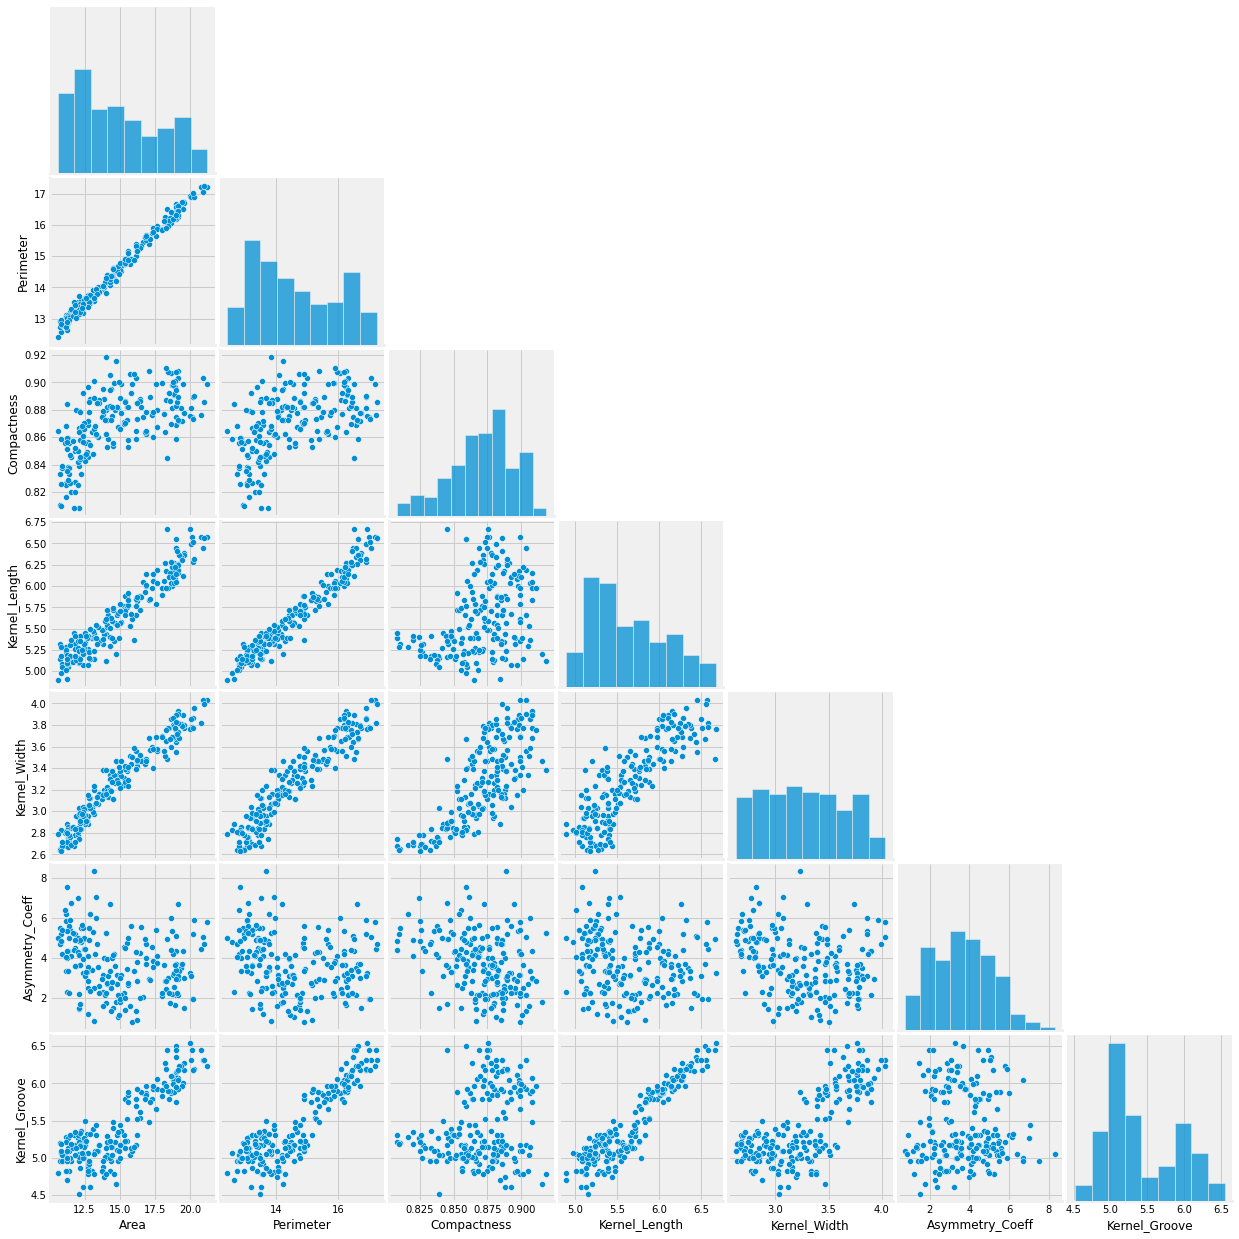

In [25]:
sns.pairplot(df.drop('Type', axis = 1), corner=True)
plt.show()

<text><b><u>Insights:</u></b><br> 
    1. Adding to this insights found/explored in Q4, below are some more findings on the interactions between features.<br>
    2. Most of the features like Area, Perimeter, Kernel Length are right/positive skewed and Compactness is negative/left skewed. Whereas, features like Kernel Width appear to follow Uniform distribution and Asymmetric Coefficient follows Normal distribution.<br> 
    3. Feature-feature pairs like Area-Perimeter, Area-Kernel Length, Area-Kernel Width, Perimter-Kernel Length, Perimeter-Kernel Width, Perimeter-Kernel Groove, Kernel Length - Kernel Width, Kernel Length - Kernel Groove show a fairly strong positive correlation strength.<br> 
    4. Pairs like Kernel Width - Kernel Groove and in general feature pairs with Compactness and Asymmetric Coefficient etc. do not show any correlation effect and seem to be scattered all over.<br> 
    5. Feature normalization can be a technique that can be used to handle these features which are at different scales so that the algorithm can learn efficiently.<br> 
    6. Feature transformation can also be applied to reduce skewness of data and transform it towards a normal distribution. (log, power transformations etc.)<br>

### Q4
<text>Do the correlational analysis on the dataset. Provide a visualization for the same. Will 
this correlational analysis have an effect on feature selection that you will perform in the 
next step? Justify your answer.  </text>

In [26]:
print('CORRELATION ANALYSIS:')
print('----------- --------')
corr_df = df.corr()
corr_df

CORRELATION ANALYSIS:
----------- --------


,Area,Perimeter,Compactness,Kernel_Length,Kernel_Width,Asymmetry_Coeff,Kernel_Groove,Type
Area,1.000000,0.994437,0.609887,0.951126,0.970980,-0.222820,0.862727,-0.340664
Perimeter,0.994437,1.000000,0.531841,0.972944,0.945496,-0.211034,0.889543,-0.322223
Compactness,0.609887,0.531841,1.000000,0.374011,0.762167,-0.329400,0.227016,-0.539261
Kernel_Length,0.951126,0.972944,0.374011,1.000000,0.862680,-0.169704,0.932124,-0.249422
Kernel_Width,0.970980,0.945496,0.762167,0.862680,1.000000,-0.253122,0.748228,-0.421961
Asymmetry_Coeff,-0.222820,-0.211034,-0.329400,-0.169704,-0.253122,1.000000,-0.003349,0.573956
Kernel_Groove,0.862727,0.889543,0.227016,0.932124,0.748228,-0.003349,1.000000,0.035508
Type,-0.340664,-0.322223,-0.539261,-0.249422,-0.421961,0.573956,0.035508,1.000000


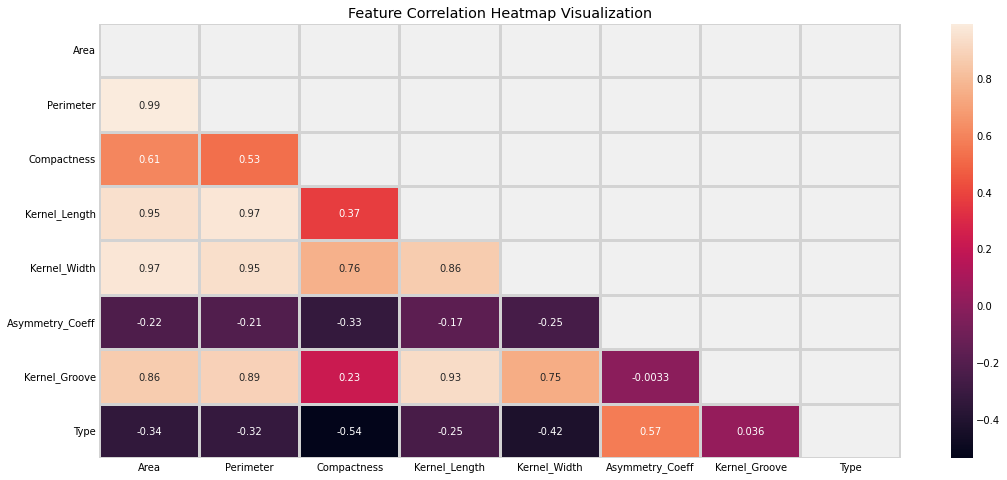

In [27]:
plt.figure(figsize=(16, 8))
sns.heatmap(corr_df, annot=True, linewidths=2, linecolor='lightgrey', mask=np.triu(corr_df))
plt.title('Feature Correlation Heatmap Visualization')
plt.show()

<text><b><u>Observations:</u></b><br> 
    1. From the above heatmap, we can infer that Area and Perimeter are strongly positive co-related (0.99), Kernel Length is strongly positively correlated with Area (0.95) and Perimeter(0.97), and a similar strong positive correlation exists between Kernel Width  with other features like Area (0.97), Perimeter(0.95) and Kernel Width (0.86).<br>
    2. Compactness is weakly/mildly positively correlated with other features like Area (0.61), Perimeter (0.53), Kernel Width (0.76) & has a strong negative correlation with Asymmetry Coeff (-0.33).<br>
    3. The strongest correlation amongest features exists between Area, Perimeter, Kernel Length, Kernel Width and Kernel Groove. <br>
    4. The target variable <b>Type</b> has the best/highest correlation with the feature <b>Asymmetry Coeff</b> (0.57). Rest all features have negative correlation with Type.<br>
    
    TOP 5 CORRELATION STRENGTHS:
    Area & Perimeter                 - 0.99
    Perimeter & Kernel Length        - 0.97
    Area & Kernel Width              - 0.97
    Perimeter & Kernel Width         - 0.95
    Area & Kernel Length             - 0.95

In [28]:
#Copying to a new Data Frame for preprocessing and cleaning
df_pre = df.copy(deep=True)
#Dropping Perimeter (Since it is highly correlated ot Area and Kernel_Length and Kernel_Width)
df_pre.drop(['Perimeter'], axis = 1, inplace = True)

## 2.Data Pre-processing and cleaning

### Q1
<text>Do the appropriate preprocessing steps:
    1. Identify NULL or Missing Values based on column. 
    2. Apply appropriate feature engineering techniques for them.
</text>

In [29]:
# checking for null values
null_counts = df_pre.isna().sum().sort_values(ascending = False)
print('NULL COUNTS\n---- ------')
print(null_counts)

NULL COUNTS
---- ------
Area               0
Compactness        0
Kernel_Length      0
Kernel_Width       0
Asymmetry_Coeff    0
Kernel_Groove      0
Type               0
dtype: int64


<text><b><u>Observations:</u></b><br> 
    1. We have no NULL values in any of the features. Hence, NULL values preprocessing can be bypassed.

In [30]:
# checking for negative values
neg_counts = (df_pre < 0).sum().sort_values(ascending=False)
print('NEGATIVE VALUE COUNTS\n-------- ----- ------')
print(neg_counts)

NEGATIVE VALUE COUNTS
-------- ----- ------
Area               0
Compactness        0
Kernel_Length      0
Kernel_Width       0
Asymmetry_Coeff    0
Kernel_Groove      0
Type               0
dtype: int64


<text><b><u>Observations:</u></b><br> 
    1. By domain knowledge, we know that none of the features can have a true negative value. (eg: dimensions, area, perimeter of the seed can not be negative) Hence we do this check to validate if there are any outliers or bad datapoints.<br>
    2. We have no negative values in any of the features.<br>
    3. Most of the features also have very low number of outlier values, but nothing alarming. Further domain knowledge could help us validate whether these are actual outliers or noise or bad data. (mean, median, domain knowledge etc.)<br>

<text><b><u>NOTE:</u></b><br>
    1. Since do not have any missing/NULL and negative values (bad datapoints), we do not have the need for imputation.<br>
    2. In any other case, we can handle these by using a few simple techniques like Mean/Median Imputation, domain knowledge or a bit more sophisticated techniques like kNN, Imputation using Deep Learning etc.</text>

Outlier Handling. 
Based on the EDA in Section 1, we see that there are outliers in features Asymmetry_Coeff and Compactness. We will handle them here.

In [31]:
#Outlier removal in columns Asymmetry.Coeff and Compactness
q1 = df_pre['Asymmetry_Coeff'].quantile(0.25)
q3 = df_pre['Asymmetry_Coeff'].quantile(0.75)
iqr = q3-q1 #Interquartile range
low  = q1-1.5*iqr
high = q3+1.5*iqr
df_out = df_pre.loc[(df_pre['Asymmetry_Coeff'] > low) & (df_pre['Asymmetry_Coeff'] < high)]
q1 = df_out['Compactness'].quantile(0.25)
q3 = df_out['Compactness'].quantile(0.75)
iqr = q3-q1 #Interquartile range
low  = q1-1.5*iqr
high = q3+1.5*iqr
df_out2 = df_out.loc[(df_out['Compactness'] > low) & (df_out['Compactness'] < high)]

In [32]:
df_out2.isna().sum()

Area               0
Compactness        0
Kernel_Length      0
Kernel_Width       0
Asymmetry_Coeff    0
Kernel_Groove      0
Type               0
dtype: int64

In [33]:
df_out2.reset_index(drop=True)

,Area,Compactness,Kernel_Length,Kernel_Width,Asymmetry_Coeff,Kernel_Groove,Type
0,15.26,0.8710,5.763,3.312,2.221,5.220,1
1,14.88,0.8811,5.554,3.333,1.018,4.956,1
2,14.29,0.9050,5.291,3.337,2.699,4.825,1
3,13.84,0.8955,5.324,3.379,2.259,4.805,1
4,16.14,0.9034,5.658,3.562,1.355,5.175,1
...,...,...,...,...,...,...,...
189,12.37,0.8567,5.204,2.960,3.919,5.001,3
190,12.19,0.8783,5.137,2.981,3.631,4.870,3
191,11.23,0.8511,5.140,2.795,4.325,5.003,3
192,11.84,0.8521,5.175,2.836,3.598,5.044,3


In [34]:
df_out2.isna().sum()

Area               0
Compactness        0
Kernel_Length      0
Kernel_Width       0
Asymmetry_Coeff    0
Kernel_Groove      0
Type               0
dtype: int64

### Q2
<text>Use MinMax normalization for feature transformation. </text>
*Add a note on why this might be not needed for Decision Tree Classifier*

In [35]:
#WITHOUT SKLEARN
scaled_df = df_pre[['Area', 'Compactness','Kernel_Length','Kernel_Width','Asymmetry_Coeff','Kernel_Groove']].copy()
df_norm = (scaled_df - scaled_df.min()) / (scaled_df.max() - scaled_df.min())
df_type = df_pre[['Type']].copy()
###################OR#######################
#WITH SKLEARN
#Initialize
scaler = MinMaxScaler()
#Fit and transform columns
df_norm = scaler.fit_transform(scaled_df)
#Convert from np.array to dataframe
df_norm = pd.DataFrame(df_norm, columns=scaled_df.columns)
df_norm = pd.concat([df_norm, df_type], axis=1)
#df_norm_out = df_norm.join(df_type)
df_norm.head(199)

,Area,Compactness,Kernel_Length,Kernel_Width,Asymmetry_Coeff,Kernel_Groove,Type
0,0.440982,0.570780,0.486486,0.486101,0.192837,0.345150,1
1,0.405099,0.662432,0.368806,0.501069,0.033497,0.215165,1
2,0.349386,0.879310,0.220721,0.503920,0.256149,0.150665,1
3,0.306893,0.793103,0.239302,0.533856,0.197870,0.140817,1
4,0.524079,0.864791,0.427365,0.664291,0.078133,0.322994,1
...,...,...,...,...,...,...,...
194,0.151086,0.637024,0.134009,0.250178,0.379594,0.172821,3
195,0.060434,0.390200,0.135698,0.117605,0.471516,0.238306,3
196,0.246459,0.727768,0.189752,0.429081,1.000000,0.264402,3
197,0.118036,0.399274,0.155405,0.146828,0.375224,0.258493,3


<text><b><u>NOTE:</u></b><br>
Since 'Type' (target label) has 3 classes/continous variable as target, we  exclude that column and perform MinMaxScaler and concatenate post scaling

In [36]:
df_norm.isna().sum()

Area               0
Compactness        0
Kernel_Length      0
Kernel_Width       0
Asymmetry_Coeff    0
Kernel_Groove      0
Type               0
dtype: int64

## 3. Model Building

### Q1
<text>Split the dataset into training and test sets. </text>

#### Split Data Frame into Features (X), Target (y)

In [37]:
target = 'Type'
features = [col for col in df_out2.columns if col != target]

X = df_out2[features]
y = df_out2[target]

In [67]:
#Create X adn y using the dataset with outliers in it.
X_out = df_pre[features]
y_out = df_pre[target]

#### Data Split : Taking 80% data as Training data and rest 20% data for Testing (Parameterized)

In [38]:
# splitting data into training and test set using train_test_split sklearn.model_selection
test_size = 0.2
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=test_size,
                                                    random_state=119)

In [68]:
# splitting data into training and test set using train_test_split sklearn.model_selection
test_size = 0.2
X_train_out, X_test_out, y_train_out, y_test_out = train_test_split(X_out,
                                                    y_out,
                                                    test_size=test_size,
                                                    random_state=119)

#### Cross Check if Target distribution is consistent between the train and test sets.

In [39]:
#OVERALL TARGET DISTRIBUTION
df_out2['Type'].value_counts(1)

2    0.350515
1    0.340206
3    0.309278
Name: Type, dtype: float64

In [40]:
#TRAIN OUTCOME DISTRIBUTION
y_train.value_counts(1)

2    0.367742
1    0.322581
3    0.309677
Name: Type, dtype: float64

In [41]:
#TEST OUTCOME DISTRIBUTION
y_test.value_counts(1)

1    0.410256
3    0.307692
2    0.282051
Name: Type, dtype: float64

We observe that the distribution(%) across the train and test cuts slightly varies but not by too much <br>
<table><tr><td> Type </td><td> Train </td> <td> Test </td> </tr>
    <tr><td> 1 </td><td> 32.25 </td> <td> 41.02 </td> </tr>
    <tr><td> 2 </td><td> 36.77 </td> <td> 28.20 </td> </tr>
    <tr><td> 3 </td><td> 30.97 </td> <td> 30.77 </td> </tr></table>
    

There is a slight variation between different classes after removing the outliers as most of the outliers were in Type 3. 

<text><b><u>NOTE:</u></b> Feature transformation, Hyperparameter tuning and 

---

Model building using Decision Tree is answered in the following cells of Q2.

---

</text> 



### Q2
<text>Build Models using decision tree and KNN. Identify the best parameter and justify your 
answer</text>

#### Model Training

#### Cross Validation
<br>Cross-validation is used to estimate the efficiency of the model on unseen data. To provide a more accurate estimate of out-of-sample accuracy. More “efficient” use of data as every observation is used for both training and test

In [42]:
#Stratified K Fold Cross Validation Initialization
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=2, random_state=119)

### Model Building using Decision Tree

#### Fine/Hyperparameter Tuning
<text><b>Hyperparameter Tuning to improve Accuracy<br></b>
    Decision Tree can be optimized by tuning the hyperparamters. Using GridSearch, we get the best set of hyperparameters - Grid Search passes all combinations of hyperparameters one by one into the model and checks the result giving us the set of hyperparemeters that provides the best result after passing in the model.

In [43]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 155 entries, 96 to 166
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area             155 non-null    float64
 1   Compactness      155 non-null    float64
 2   Kernel_Length    155 non-null    float64
 3   Kernel_Width     155 non-null    float64
 4   Asymmetry_Coeff  155 non-null    float64
 5   Kernel_Groove    155 non-null    float64
dtypes: float64(6)
memory usage: 8.5 KB


In [44]:
X_train.describe()

,Area,Compactness,Kernel_Length,Kernel_Width,Asymmetry_Coeff,Kernel_Groove
count,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000
mean,15.024387,0.872717,5.645271,3.282065,3.659143,5.432200
std,2.907035,0.021743,0.443329,0.371478,1.453264,0.497959
min,10.590000,0.816700,4.899000,2.642000,0.855100,4.605000
25%,12.450000,0.858900,5.265000,2.967500,2.483000,5.045500
50%,14.520000,0.874600,5.527000,3.259000,3.598000,5.228000
75%,17.985000,0.887050,6.019500,3.577500,4.733500,5.879500
max,20.880000,0.918300,6.675000,4.032000,7.524000,6.550000


In [45]:
tree_param = [{'criterion': ['entropy', 'gini'], 'max_depth': np.arange(2, 9),
              'min_samples_leaf': np.arange(1,5)}]
#Grid search
dtree_model = GridSearchCV(estimator=DecisionTreeClassifier(random_state=42), 
                     param_grid=tree_param, 
                     cv=cv,
                     verbose=1, 
                     scoring='accuracy')

In [69]:
#Building the DecisionTreeClassifier with the train/test data with outliers

#Grid search
dtree_model_out = GridSearchCV(estimator=DecisionTreeClassifier(random_state=42), 
                     param_grid=tree_param, 
                     cv=cv,
                     verbose=1, 
                     scoring='accuracy')

In [46]:
dtree_model = dtree_model.fit(X_train, y_train)


Fitting 10 folds for each of 56 candidates, totalling 560 fits


In [70]:
dtree_model_out = dtree_model_out.fit(X_train_out, y_train_out)

Fitting 10 folds for each of 56 candidates, totalling 560 fits


#### Cross Validation Performance Visualization

In [47]:
print('Best Parameters:', dtree_model.best_params_)
print('Best Accuracy Score:', dtree_model.best_score_.round(3))
print('Best Estimator:',dtree_model.best_estimator_)

Best Parameters: {'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 2}
Best Accuracy Score: 0.919
Best Estimator: DecisionTreeClassifier(max_depth=5, min_samples_leaf=2, random_state=42)


### Graphical Representation of the Decision Tree generated by the model

In [48]:
#make sure Graphviz is installed from https://graphviz.org/download/
import os
os.environ["PATH"] += os.pathsep + 'C:\Anaconda3\Lib\site-packages\graphviz'
os.environ["PATH"] += os.pathsep + 'C:/Program Files/Graphviz/bin/'

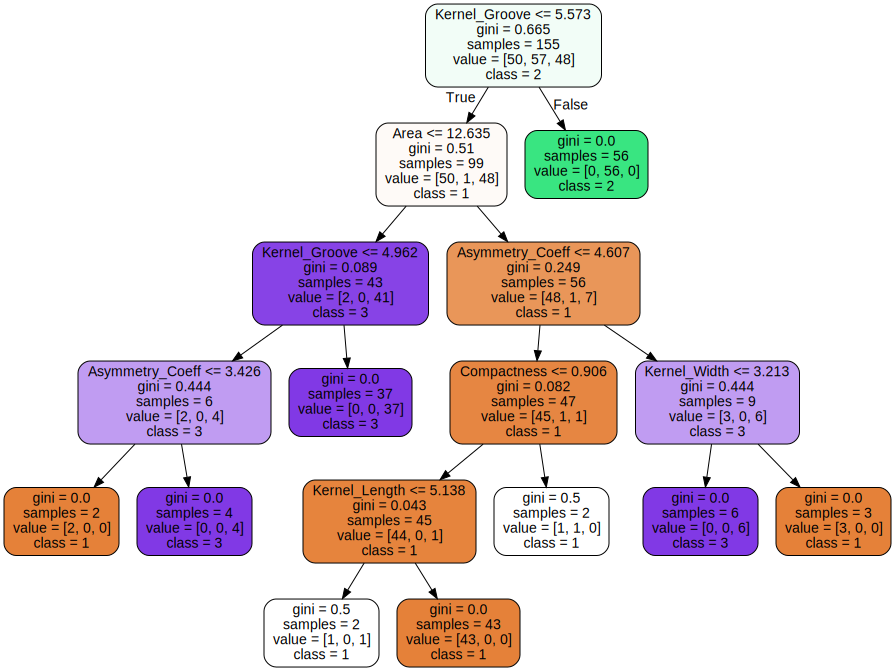

In [49]:

file_ext = 'pdf'
temp_img = 'temp_file'
temp_img_name = "".join([temp_img, '.'+file_ext])

dot_data = export_graphviz(dtree_model.best_estimator_, out_file=None, filled=True, rounded=True,
                                feature_names=features,  
                                class_names=['1','2','3'])
graph = graphviz.Source(dot_data)  
graph.render(temp_img,format=file_ext, view=False)
graph

#### Evaluation Metrics Generation

In [50]:
#Function to generate desired evaluation metrics
def evaluationMetrics(actuals, preds, test = False, confMat = True):
    if test != True:
        datatype = 'Training'
    else:
        datatype = 'Testing'
        
    print("Evaluation Metrics")
    print("---------- -------")
    acc = accuracy_score(actuals, preds).round(3)
    
    print('\nAccuracy: {:.3f}\n'.format(accuracy_score(actuals, preds)))

    print('Micro Precision: {:.3f}'.format(precision_score(actuals, preds, average='micro')))
    print('Micro Recall: {:.3f}'.format(recall_score(actuals, preds, average='micro')))
    print('Micro F1-score: {:.3f}\n'.format(f1_score(actuals, preds, average='micro')))

    print('Macro Precision: {:.3f}'.format(precision_score(actuals, preds, average='macro')))
    print('Macro Recall: {:.3f}'.format(recall_score(actuals, preds, average='macro')))
    print('Macro F1-score: {:.3f}\n'.format(f1_score(actuals, preds, average='macro')))

    print('Weighted Precision: {:.3f}'.format(precision_score(actuals, preds, average='weighted')))
    print('Weighted Recall: {:.3f}'.format(recall_score(actuals, preds, average='weighted')))
    print('Weighted F1-score: {:.3f}\n'.format(f1_score(actuals, preds, average='weighted')))    
    
    if confMat == True:
        print("Confusion Matrix")
        print("--------- ------")
        cm = confusion_matrix(actuals, preds)
        confMatrixPlot(cm)
        
    print(f"Classification Report")
    print("--------------- ------")
    print(f"{classification_report(actuals, preds, digits = 3, target_names=['Type 1', 'Type 2', 'Type 3'])}")
    
    return acc
    
def confMatrixPlot(cm):
        sns.heatmap(cm,
                    annot=True,
                    fmt='.0f',
                    cmap='YlGn',
                    xticklabels=['Kama', 'Rosa', 'Canadian'],
                    yticklabels=['Kama', 'Rosa', 'Canadian'])
        plt.ylabel('Actual label', fontsize=14)
        plt.xlabel('Predicted label', fontsize=14)
        plt.show()

### Train Data Evaluation

In [51]:
#predict on train data
dtree_train_predicts = dtree_model.predict(X_train)

Evaluation Metrics
---------- -------

Accuracy: 0.987

Micro Precision: 0.987
Micro Recall: 0.987
Micro F1-score: 0.987

Macro Precision: 0.987
Macro Recall: 0.987
Macro F1-score: 0.987

Weighted Precision: 0.988
Weighted Recall: 0.987
Weighted F1-score: 0.987

Confusion Matrix
--------- ------


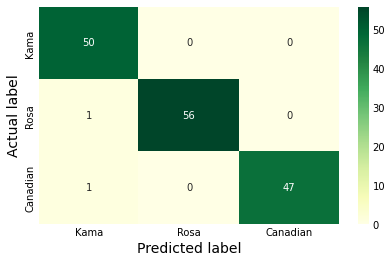

Classification Report
--------------- ------
              precision    recall  f1-score   support

      Type 1      0.962     1.000     0.980        50
      Type 2      1.000     0.982     0.991        57
      Type 3      1.000     0.979     0.989        48

    accuracy                          0.987       155
   macro avg      0.987     0.987     0.987       155
weighted avg      0.988     0.987     0.987       155



In [52]:
train_acc = evaluationMetrics(y_train, dtree_train_predicts)

###Train Data Evaluation on Dataset with Outliers

In [93]:
#predict on train data
dtree_train_predicts_out = dtree_model_out.predict(X_train_out)

In [94]:
train_acc_out = evaluationMetrics(y_train_out, dtree_train_predicts_out, confMat=False)

Evaluation Metrics
---------- -------

Accuracy: 0.987

Micro Precision: 0.987
Micro Recall: 0.987
Micro F1-score: 0.987

Macro Precision: 0.988
Macro Recall: 0.988
Macro F1-score: 0.987

Weighted Precision: 0.988
Weighted Recall: 0.987
Weighted F1-score: 0.987

Classification Report
--------------- ------
              precision    recall  f1-score   support

      Type 1      0.963     1.000     0.981        52
      Type 2      1.000     0.982     0.991        56
      Type 3      1.000     0.980     0.990        51

    accuracy                          0.987       159
   macro avg      0.988     0.988     0.987       159
weighted avg      0.988     0.987     0.987       159



## 4. Performance Evaluation

### Q1
<text>Do the prediction for the test data and display the results for the inference. </text>

In [53]:
#Predict using test data features
dtree_test_predicts = dtree_model.predict(X_test)

test_pred_df = X_test.copy()
test_pred_df['Actual_Type'] = y_test
test_pred_df['Predicted_Type'] = dtree_test_predicts

#Displayed Actual, Predicted Values
test_pred_df.head()

,Area,Compactness,Kernel_Length,Kernel_Width,Asymmetry_Coeff,Kernel_Groove,Actual_Type,Predicted_Type
70,16.82,0.8786,6.017,3.486,4.004,5.841,2,2
184,10.82,0.8256,5.180,2.630,4.853,5.089,3,3
99,19.18,0.8717,6.369,3.681,3.357,6.229,2,2
58,11.23,0.8840,4.902,2.879,2.269,4.703,1,1
64,14.01,0.8625,5.609,3.158,2.217,5.132,1,1


In [77]:
#Predict using test data features on dataset with Outliers present
dtree_test_predicts_out = dtree_model_out.predict(X_test_out)



```
# This is formatted as code
```


<text>Print test Accuracy, Recall, F1 Score for all classes </text>

###Results with clean dataset

Evaluation Metrics
---------- -------

Accuracy: 0.949

Micro Precision: 0.949
Micro Recall: 0.949
Micro F1-score: 0.949

Macro Precision: 0.951
Macro Recall: 0.951
Macro F1-score: 0.950

Weighted Precision: 0.951
Weighted Recall: 0.949
Weighted F1-score: 0.949

Confusion Matrix
--------- ------


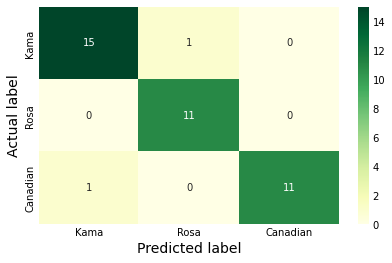

Classification Report
--------------- ------
              precision    recall  f1-score   support

      Type 1      0.938     0.938     0.938        16
      Type 2      0.917     1.000     0.957        11
      Type 3      1.000     0.917     0.957        12

    accuracy                          0.949        39
   macro avg      0.951     0.951     0.950        39
weighted avg      0.951     0.949     0.949        39



In [54]:
test_acc = evaluationMetrics(y_test, dtree_test_predicts, test=True, confMat=True)

###Results with dataset with outliers included

In [84]:
test_acc_out = evaluationMetrics(y_test_out, dtree_test_predicts_out, test=True, confMat=False)

Evaluation Metrics
---------- -------

Accuracy: 0.900

Micro Precision: 0.900
Micro Recall: 0.900
Micro F1-score: 0.900

Macro Precision: 0.901
Macro Recall: 0.905
Macro F1-score: 0.902

Weighted Precision: 0.900
Weighted Recall: 0.900
Weighted F1-score: 0.899

Classification Report
--------------- ------
              precision    recall  f1-score   support

      Type 1      0.857     0.857     0.857        14
      Type 2      0.923     1.000     0.960        12
      Type 3      0.923     0.857     0.889        14

    accuracy                          0.900        40
   macro avg      0.901     0.905     0.902        40
weighted avg      0.900     0.900     0.899        40



###Insights


<text>Insights on the obtained confusion matrix in this case using <b> Decision Tree Classifier <b> 
*Only data based on the clean dataset without outliers*

<text><b><u>Insights:</u></b><br> 
    1. The confusion matrix shows the aggregated counts of correct and misclassifications of target label by their respective classes.<br>
    2. The x-axis of the confusion matrix shows the predicted target label by class.<br>
    3. The y-axis of the confusion matrix shows the actual target label  by class.<br>
    4. Consider type '1' (Kama),  type '2' (Rosa) and type '3' Canadian.<br>
    
    Training Matrix
    (actuals, predicted) 
    Let us calculate the TP, TN, FP, FN values for the class '1'
    True Positive (TP)  -class '1'   = 50
    False Positive (FP) -class '1'   = 2
    True Negative  (TN) -class '1'   = 103 
    False Negative (FN) -class '1'   = 0
    
    Similarly, TP, FP, FN and TN can be obtained for Classes '2' and '3'
    
    [Training ACCURACY, Micro, which is across all classes = TP+TN/(TP+FP+TN+FN)]  = 153/155 = 0.9871
    
    [Testing ACCURACY, Micro = TP+TN/(TP+FP+TN+FN)] = 37/39 = 0.9487
       
    For the most suitable/ideal situation, our False Positives and Negatives (FP,FN) should be zero. (reduce misclassifications)
    When our FP and FN are 0, our accuracy will be 100%.
    
    Our focus is to maintain False Negatives as low as possible, to ensure right classification of the wheeat seeds, it can still be validated with further tests.
    
    Hence, we try to tune hyperparameters/transform features and retrain to minimize our FP and FN accordingly.
    Thereshold Analysis using ROC curve can also be a way to approach.      

In [55]:
print('Training Accuracy : {:.2f}%'.format(train_acc*100))
print('Testing Accuracy  : {:.2f}%'.format(test_acc*100))

Training Accuracy : 98.70%
Testing Accuracy  : 94.90%


In [83]:
#Train and Test Accuracy of Decision Tree Classifier on dataset with outliers
print('Training Accuracy with Outliers included: {:.2f}%'.format(train_acc_out*100))
print('Testing Accuracy with Outliers included : {:.2f}%'.format(test_acc_out*100))

Training Accuracy with Outliers included: 98.70%
Testing Accuracy with Outliers included : 90.00%


We can infer that the training accuracy is same with and without outliers. But the test accuracy is better if outliers are removed. 

### Misclassifications using <b>Decision Tree Classifier

In [85]:
test_pred_df[test_pred_df.Actual_Type != test_pred_df.Predicted_Type]

,Area,Compactness,Kernel_Length,Kernel_Width,Asymmetry_Coeff,Kernel_Groove,Actual_Type,Predicted_Type
142,12.70,0.8491,5.386,2.911,3.26,5.316,3,1
7,16.63,0.8747,6.053,3.465,2.04,5.877,1,2


<text><b><u>Insights:</u></b><br> 
    1. The accuracy of prediction for the train data is around 99% and unseen test data is around 95% for a varied split of training-testing data <br>
    2. We do see a potential case of overfitting, where the model almost exactly fits to the traning data but slightly under-performs with the unseen test data  <br>
    3. This can be overcome by using a larger data sample, adding/transforming more features, or use regularization <br>

### Train model using KNN before hyperparameter tuning

In [57]:
#Create KNN Object.
knn = KNeighborsClassifier()
k_range = list(range(1, 31))
param_grid = dict(n_neighbors=k_range)
  
# defining parameter range
knn_grid_search = GridSearchCV(knn, param_grid, cv=cv, scoring='accuracy', return_train_score=False,verbose=1)
  
# fitting the model for grid search
knn_grid=knn_grid_search.fit(X_train, y_train)

Fitting 10 folds for each of 30 candidates, totalling 300 fits


In [58]:
knn_grid.best_params_

{'n_neighbors': 7}

In [59]:
#Predict train data set.
knn_training_predictions = knn_grid.predict(X_train)

### Prediction on Test Data
Now we have the best hyperparameter of K =7, this can be used to fit a KNN model and check its accuracy on the unseen test dataset.

In [86]:
#Predict test data set.
knn_testing_predictions = knn_grid.predict(X_test)

test_pred_knn_df = X_test.copy()
test_pred_knn_df['Actual_Type'] = y_test
test_pred_knn_df['Predicted_Type'] = knn_testing_predictions

#Displayed Actual, Predicted Values
#test_pred_knn_df.head()

Evaluation Metrics
---------- -------

Accuracy: 0.942

Micro Precision: 0.942
Micro Recall: 0.942
Micro F1-score: 0.942

Macro Precision: 0.940
Macro Recall: 0.941
Macro F1-score: 0.940

Weighted Precision: 0.942
Weighted Recall: 0.942
Weighted F1-score: 0.942

Confusion Matrix
--------- ------


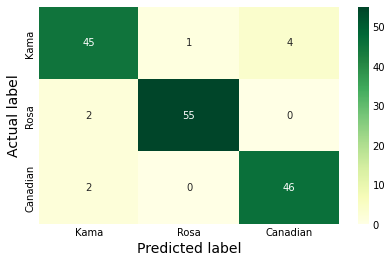

Classification Report
--------------- ------
              precision    recall  f1-score   support

      Type 1      0.918     0.900     0.909        50
      Type 2      0.982     0.965     0.973        57
      Type 3      0.920     0.958     0.939        48

    accuracy                          0.942       155
   macro avg      0.940     0.941     0.940       155
weighted avg      0.942     0.942     0.942       155



In [87]:
train_acc_knn = evaluationMetrics(y_train, knn_training_predictions)

Evaluation Metrics
---------- -------

Accuracy: 0.872

Micro Precision: 0.872
Micro Recall: 0.872
Micro F1-score: 0.872

Macro Precision: 0.885
Macro Recall: 0.896
Macro F1-score: 0.874

Weighted Precision: 0.901
Weighted Recall: 0.872
Weighted F1-score: 0.868

Confusion Matrix
--------- ------


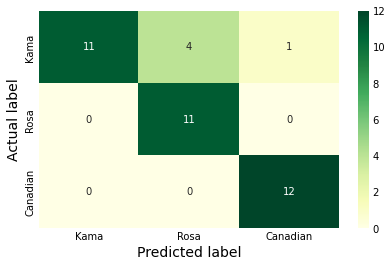

Classification Report
--------------- ------
              precision    recall  f1-score   support

      Type 1      1.000     0.688     0.815        16
      Type 2      0.733     1.000     0.846        11
      Type 3      0.923     1.000     0.960        12

    accuracy                          0.872        39
   macro avg      0.885     0.896     0.874        39
weighted avg      0.901     0.872     0.868        39



In [88]:
test_acc_knn = evaluationMetrics(y_test, knn_testing_predictions, test=True, confMat=True)

In [89]:
print('Training Accuracy : {:.2f}%'.format(train_acc_knn * 100))
print('Testing Accuracy  : {:.2f}%'.format(test_acc_knn * 100))

Training Accuracy : 94.20%
Testing Accuracy  : 87.20%


<text>Provide insights on the obtained confusion matrix in this case using <b> KNN Classifier <b> 

<text><b><u>Insights:</u></b><br> 
    1. The confusion matrix shows the aggregated counts of correct and misclassifications of target label by their respective classes.<br>
    2. The x-axis of the confusion matrix shows the predicted target label by class.<br>
    3. The y-axis of the confusion matrix shows the actual target label  by class.<br>
    4. Consider type '1' (Kama),  type '2' (Rosa) and type '3' Canadian.<br>
    
    Training Matrix
    (actuals, predicted) 
    Let us calculate the TP, TN, FP, FN values for the class '1'
    True Positive (TP)  -class '1'   = 45
    False Positive (FP) -class '1'   = 4
    True Negative  (TN) -class '1'   = 101 
    False Negative (FN) -class '1'   = 5
    
    Similarly, TP, FP, FN and TN can be obtained for Classes '2' and '3'
    
    [Training ACCURACY, Micro, which is across all classes = TP+TN/(TP+FP+TN+FN)] = 146/155 = 0.9419
    
    [Testing ACCURACY, Micro = TP+TN/(TP+FP+TN+FN)] = (11+11+12)/39 = 34/39 = 0.8718
       
    For the most suitable/ideal situation, our False Positives and Negatives (FP,FN) should be zero. (reduce misclassifications)
    When our FP and FN are 0, our accuracy will be 100%.
    
    Our focus is to maintain False Negatives as low as possible, to ensure right classification of the wheeat seeds, it can still be validated with further tests.
    
    Hence, we try to tune hyperparameters/transform features and retrain to minimize our FP and FN accordingly.
    Thereshold Analysis using ROC curve can also be a way to approach.      

### Misclassifications using <b>KNN Classifier

In [90]:
test_pred_knn_df[test_pred_df.Actual_Type != test_pred_knn_df.Predicted_Type]

,Area,Compactness,Kernel_Length,Kernel_Width,Asymmetry_Coeff,Kernel_Groove,Actual_Type,Predicted_Type
58,11.23,0.8840,4.902,2.879,2.269,4.703,1,3
34,16.20,0.8734,5.826,3.464,2.823,5.527,1,2
49,15.78,0.8923,5.674,3.434,5.593,5.136,1,2
35,17.08,0.9079,5.832,3.683,2.956,5.484,1,2
7,16.63,0.8747,6.053,3.465,2.040,5.877,1,2


### Q2
<text>Comment on underfitting/overfitting/just right model. Justify your comment. </text>

<text><b><u>Observations:</u></b><br> 
    1. Prior to model buliding, we first split the data into features (X) and target (y). <br>
    2. Then we partitioned the (X,y) data into train dataset (70%) for model training and test dataset (30%), for performance evaluation. The 30% was decided after several attempts across different sample sizes - 0.3 and above resutled in 100% accuracy on training data set for Decision Tree - it was decided to choose optimally at 30% to reduce overfitting. The size/proportion of the test dataset is parameterized and can be changed if desired.  <br>
    3. We then do hyperparameter optimization using grid search, and also fine tune using 'Stratified K Fold Cross-Validation' on the train data for both the Decision Tree and KNN. <br>
    4. a.  For Decision tree, the fine tuned model gave an accuracy of 98.7% on the train dataset and 94.19% on the test dataset with Decision tree <br>
    4. b.  For KNN,  fine tuned model gave an accuracy of 94.19% on the train dataset and 87.18% on the test dataset <br>
    5. The accuracy of prediction is consistent at around 95-98% for train data (with Decision Tree and KNN respectively)  and around 85-90% for unseen test data (with Decision Tree and KNN respectively).  <br>
    6. We do see a potential case of overfitting, where the model almost exactly fits to the traning data but slightly under-performs with the unseen test data  <br>
    7. This can be overcome by using a larger data sample, adding/transforming more features, or use regularization <br>
    8. Our focus is to maintain False Negatives as low as possible, to ensure right classification of the wheat seeds, it can still be validated with further tests. <br>
    9.  We try to tune hyperparameters/transform features and retrain to minimize our FP and FN accordingly. <br>

### Threshold Analysis (ROC Curve)

#### ROC Curve and AUC (Area under Cover) for Decision Tree Classifier

Area under the curve AUC : 0.927


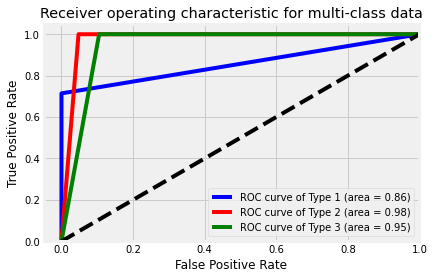

In [91]:
# Binarize the output
y = label_binarize(y, classes=[1, 2, 3])
n_classes = y.shape[1]

X_train_dt, X_test_dt, y_train_dt, y_test_dt = train_test_split(X, y, test_size=.3, random_state=0)

dt_classifier = OneVsRestClassifier(DecisionTreeClassifier(random_state=0))
y_score_dt = dt_classifier.fit(X_train_dt, y_train_dt).predict_proba(X_test_dt)

#Calculate AUC
auc_dt = roc_auc_score(y_test_dt,y_score_dt)
print(f'Area under the curve AUC : {auc_dt.round(3)}')   

fpr_dt = dict()
tpr_dt = dict()
roc_auc_dt = dict()
for i in range(n_classes):
    fpr_dt[i], tpr_dt[i], _ = roc_curve(y_test_dt[:, i], y_score_dt[:, i])
    roc_auc_dt[i] = auc(fpr_dt[i], tpr_dt[i])
colors = cycle(['blue', 'red', 'green'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr_dt[i], tpr_dt[i], color=color, 
             label='ROC curve of Type {0} (area = {1:0.2f})'
             ''.format(i+1, roc_auc_dt[i]))
    

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic for multi-class data')
plt.legend(loc="lower right")
plt.show()

#### ROC Curve and AUC (Area under Cover) for KNN Classifier

Area under the curve AUC : 0.927


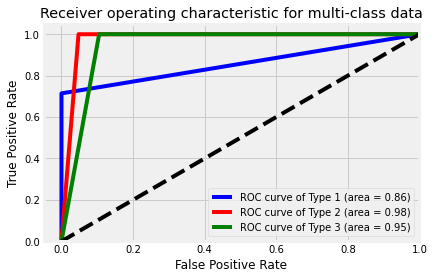

In [92]:
# Binarize the output
y = label_binarize(y, classes=[1, 2, 3])
n_classes = y.shape[1]

X_train_knn, X_test_knn, y_train_knn, y_test_knn = train_test_split(X, y, test_size=.3, random_state=0)

dt_classifier = OneVsRestClassifier(DecisionTreeClassifier(random_state=0))
y_score_knn = dt_classifier.fit(X_train_knn, y_train_knn).predict_proba(X_test_knn)

#Calculate AUC
auc_knn = roc_auc_score(y_test_knn,y_score_knn)
print(f'Area under the curve AUC : {auc_knn.round(3)}')   

fpr_knn = dict()
tpr_knn = dict()
roc_auc_knn = dict()
for i in range(n_classes):
    fpr_knn[i], tpr_knn[i], _ = roc_curve(y_test_knn[:, i], y_score_knn[:, i])
    roc_auc_knn[i] = auc(fpr_knn[i], tpr_knn[i])
colors = cycle(['blue', 'red', 'green'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr_knn[i], tpr_knn[i], color=color, 
             label='ROC curve of Type {0} (area = {1:0.2f})'
             ''.format(i+1, roc_auc_knn[i]))
    

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic for multi-class data')
plt.legend(loc="lower right")
plt.show()